# Diwali Sales Aanalysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
# using unicode escape to avoid error
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
# get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# delete unnamed columns
df.drop(['unnamed1','Status'],axis=1,inplace=True)

In [6]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# drop null values
df.dropna(inplace=True)

In [8]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender


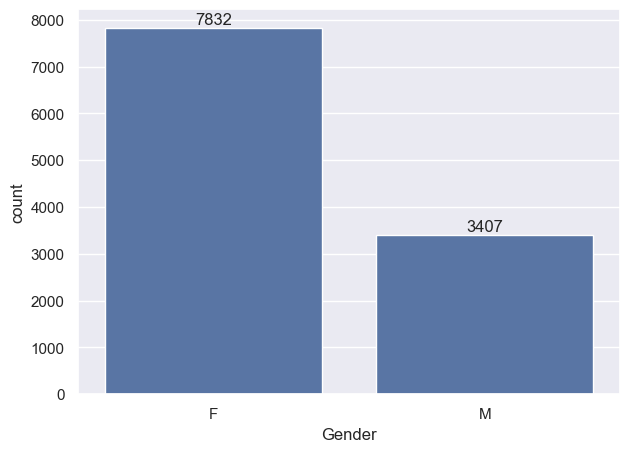

In [11]:
ax = sns.countplot(x='Gender',data=df)

sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

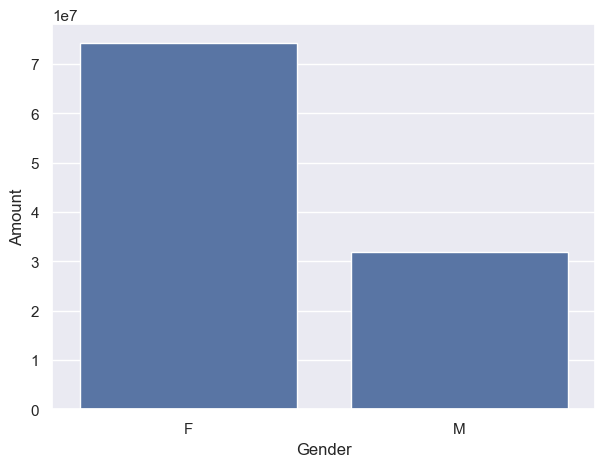

In [12]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

#### Conclusion - The number of female customers are more than the number of male customers
#### And the Amount spended by female customers is also larger than the male customers

## Age vs Amount


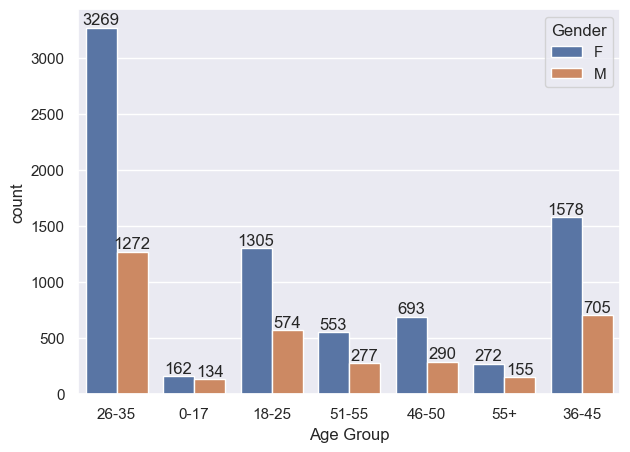

In [13]:

ax = sns.countplot(x='Age Group',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Age Group', ylabel='Amount'>

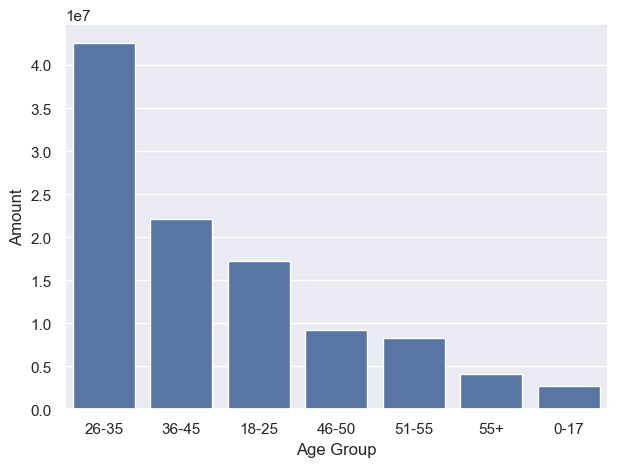

In [14]:

sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_age)

#### Conclusion - The Number of Customers are greater in the age group 26-35
####              And the Larger amount spenders are also in the same age group

## State vs Amount

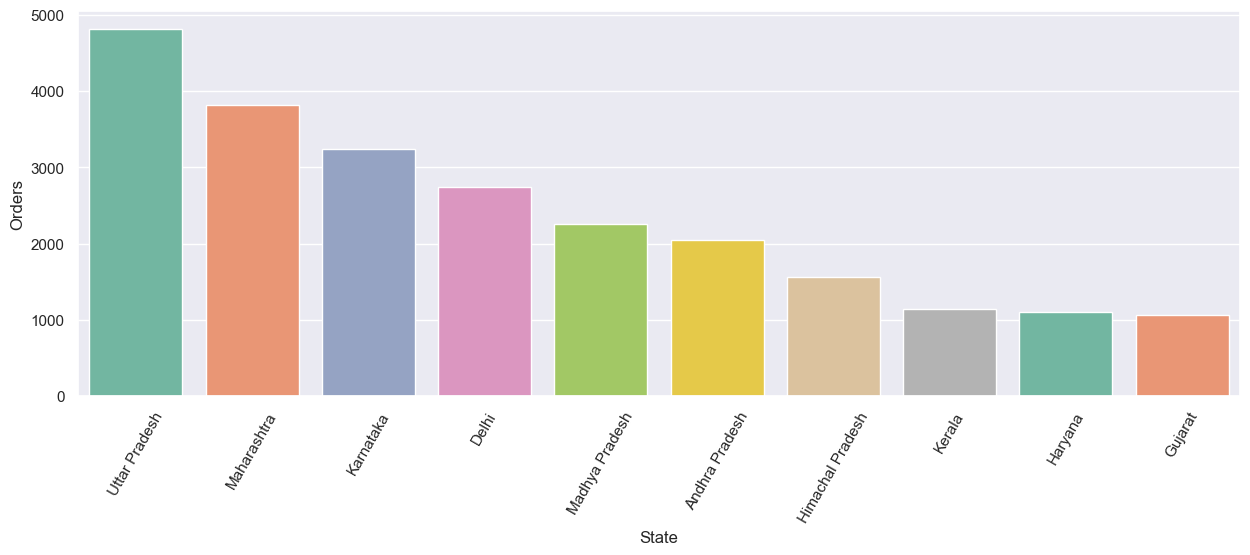

In [15]:
# total number of orders state wise

sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

custom_palette = sns.color_palette("Set2", len(sales_state))
sns.barplot(x='State',y='Orders',data=sales_state,palette=custom_palette)
plt.xticks(rotation=60)
plt.show()

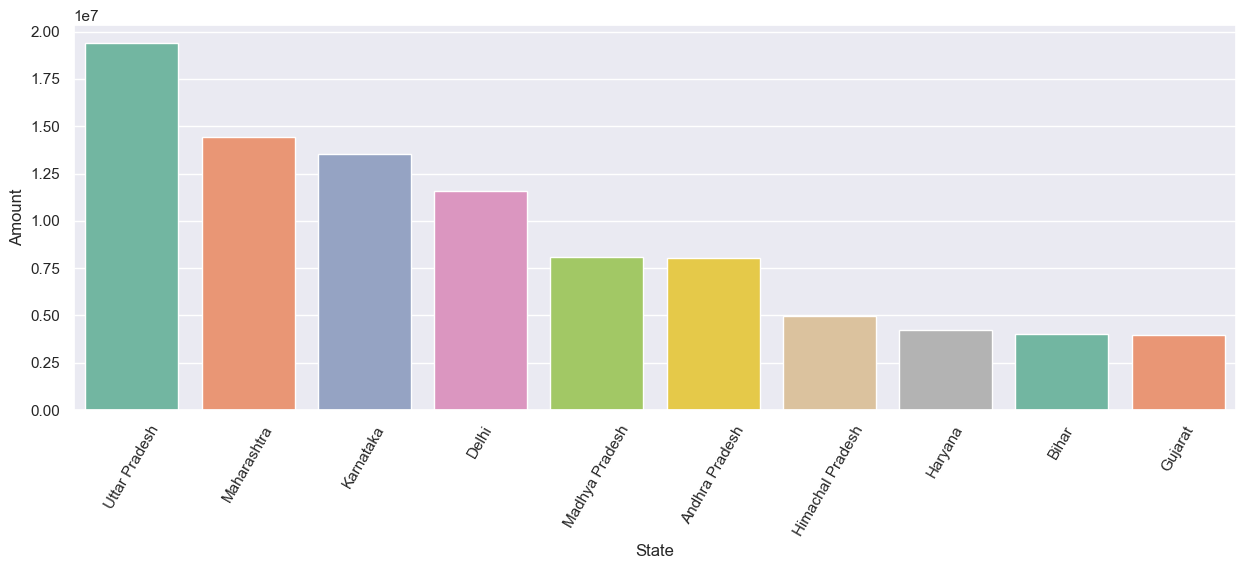

In [18]:
# total amount of sales state wise

sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
custom_palette = sns.color_palette("Set2", len(sales_state))
sns.barplot(x='State',y='Amount',data=sales_state,palette=custom_palette,hue='State')

plt.xticks(rotation=60)
plt.show()

#### Conclusion - The Number of customers are from Uttar Pradesh , Maharashtra and Karnataka
#### But the amount spend by the customers according to state is different from the number of customers
#### Haryana and Bihar have less number of customers but the amount spend is greater than that of Kerla 

## Marital Status

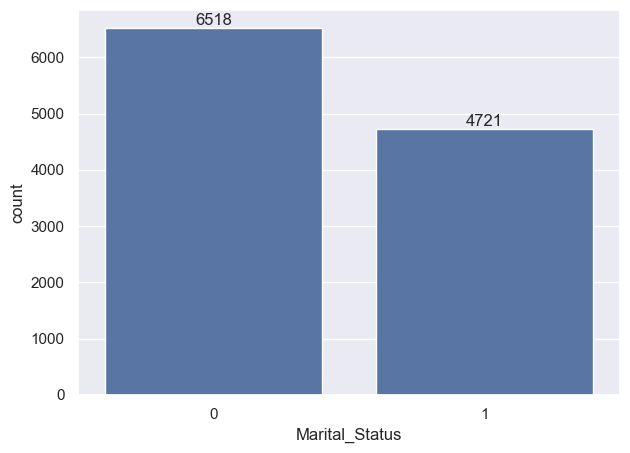

In [20]:
ax = sns.countplot(x='Marital_Status',data=df)

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

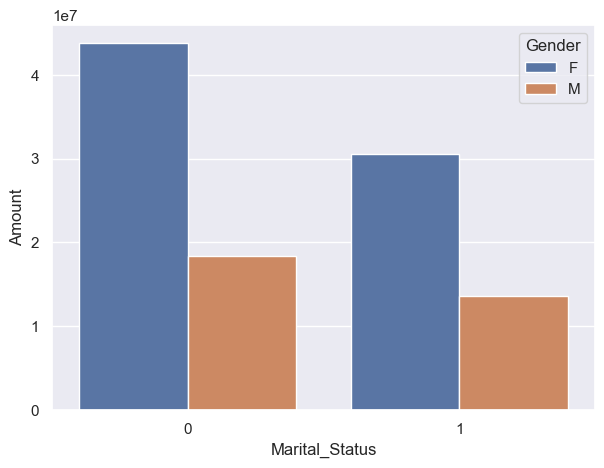

In [21]:
sales_data = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_data)


#### Conclusion - The number of married customers are greater than the single customers 
#### and the amount spend by married customers specially female partners is greater

## Occupation

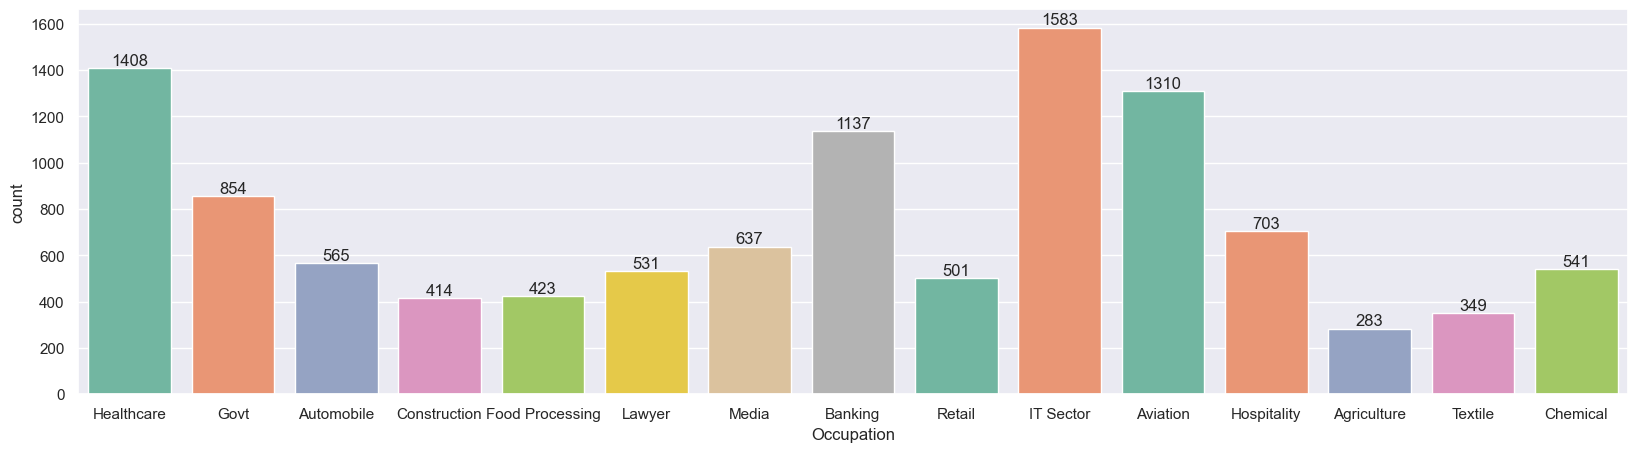

In [22]:
sns.set(rc={'figure.figsize':(20,5)})

custom_palette = sns.color_palette("Set2", len(sales_state))
ax = sns.countplot(x='Occupation',data=df,palette=custom_palette)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

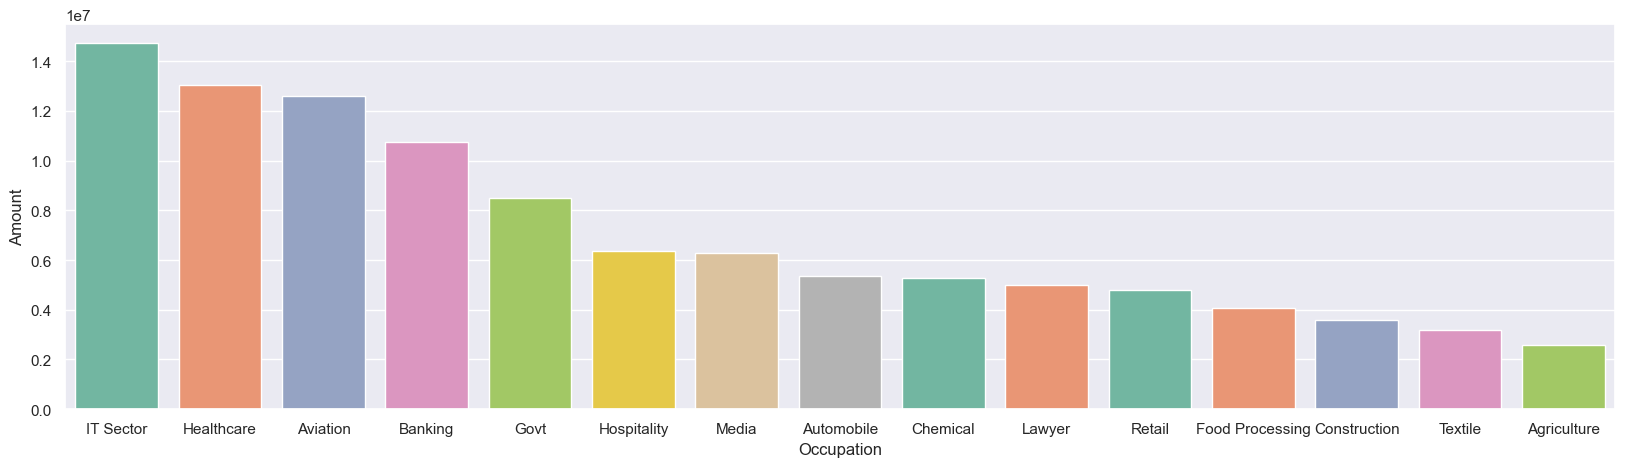

In [23]:
sales_data = df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
custom_palette = sns.color_palette("Set2", len(sales_state))
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_data,palette=custom_palette)

#### Conclusion - The number of customers are from IT Sector , Healthcare and Aviation
#### Also the larger spenders are from these 3 sectors 

## Product Category

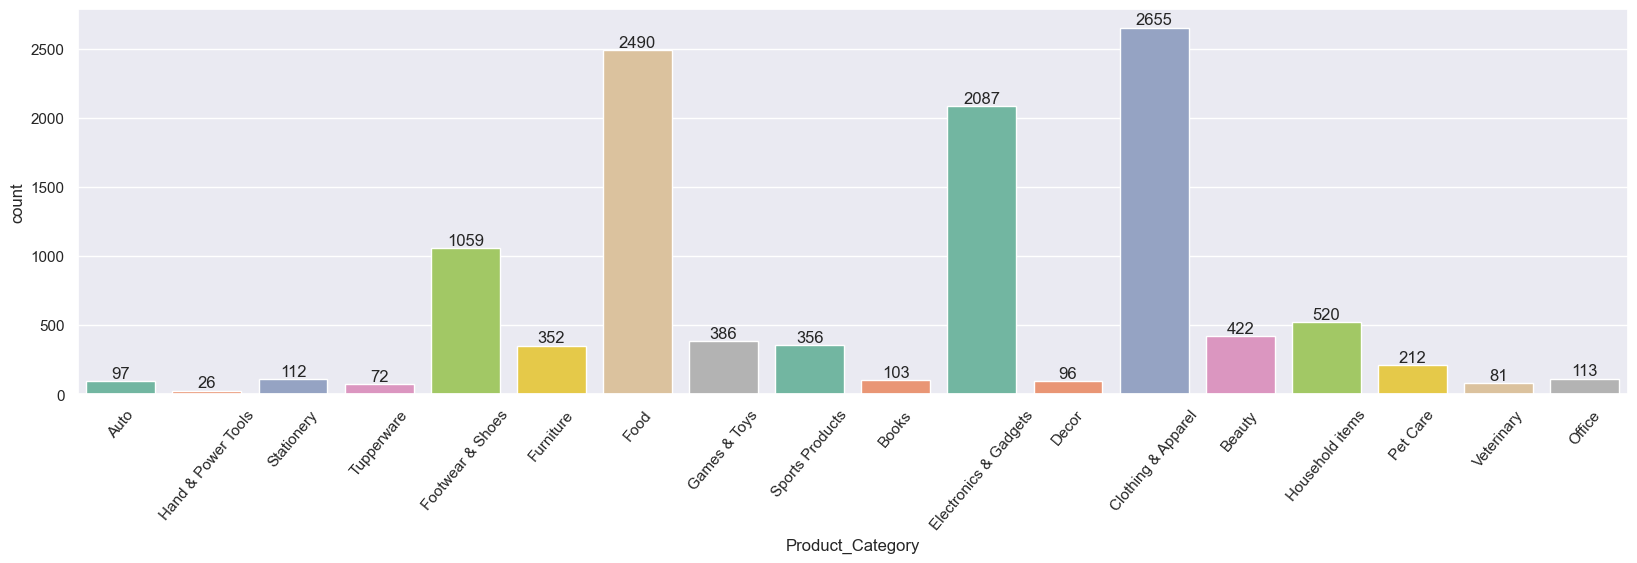

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
custom_palette = sns.color_palette("Set2", len(sales_state))
ax = sns.countplot(x='Product_Category',data=df,palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=50)
plt.show()



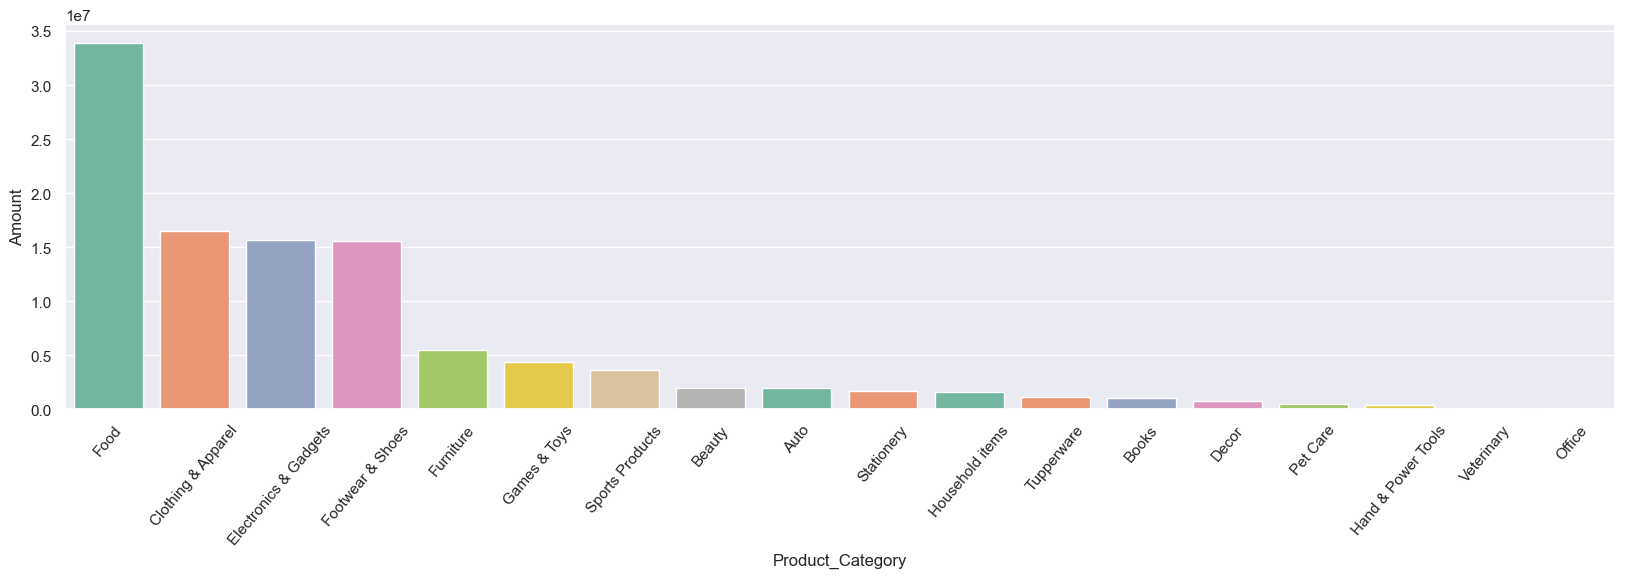

In [25]:
sales_data = df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Product_Category',y='Amount',data=sales_data,palette=custom_palette)

plt.xticks(rotation=50)
plt.show()

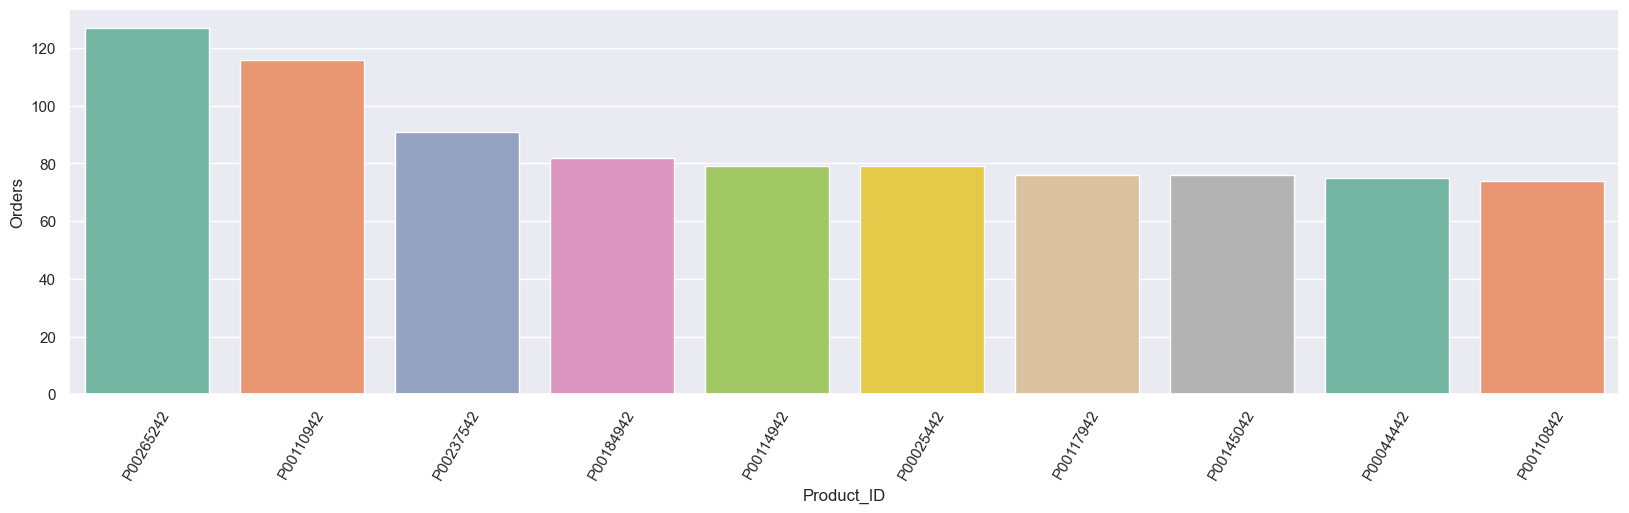

In [26]:
sales_data = df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Product_ID',y='Orders',data=sales_data,palette=custom_palette)

plt.xticks(rotation=60)
plt.show()

#### Conclusion - The large number of customers shop in the Clothing and Apparel , Food and Electronics and Gadgets Category
#### Also the amount spend by customers from these categories is high
##### The best 5 products areP00265242	127
#####        P00265242
#####        P00110942
#####        P00237542
#####        P00184942
#####        P00114942